# Input

In [1]:
%load_ext autoreload
%autoreload 2
%cd ..
%pip install -e .

import re
import os

pattern = re.compile(
    r'([^\t]+)\t'      # word form
    r'([^\t]+)\t'      # lemma
    r'([^\t])[^\t]*\t' # POS (UPOS or XPOS)
    r'([^\t]+)\t'      # ID
    r'([^\t]+)\t'      # HEAD
    r'([^\t]+)'        # DEPREL
)

target_lemma = 'air'
target_pos = 'N'

# RSC
period = '1750-1819'
corpus_folder = f'/home/volt/bach/pilot_data/RSC/1750-1819_che_half_decades'
output_folder = f'/home/volt/bach/SynFlow/output/{target_lemma}-{target_pos}-{period}'
output_explorer = f'{output_folder}/Explorer'
output_embedding = f'{output_folder}/Embedding'
input_SCD = f'/home/volt/bach/SynFlow/input/SCD/{target_lemma}-{target_pos}-{period}'

os.makedirs(output_explorer, exist_ok=True)
os.makedirs(output_embedding, exist_ok=True)
os.makedirs(input_SCD, exist_ok=True)

/home/local/bach/SynFlow
Obtaining file:///home/local/bach/SynFlow

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
ERROR: file:///home/local/bach/SynFlow does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
Note: you may need to restart the kernel to use updated packages.


# Explore the vocab freq

In [2]:
from SynFlow.Explorer.vocab_freq import gen_lemma_freq

In [ ]:
# This would be useful if you need to check for historical spelling variations
# modes: 'lemma_pos', 'lemma_pos_init', or 'lemma_deprel'
gen_lemma_freq(corpus_folder, 
               '/home/volt/bach/pilot_data/RSC/1750-1819_che_half_decades_vocab',
               file_ext='.txt', mode='lemma_pos_init')

# Explore the distribution of different syntactic slots from the corpus

## Slot-path Explorer

[1750] Collected 705 context links, 34 distinct arguments.


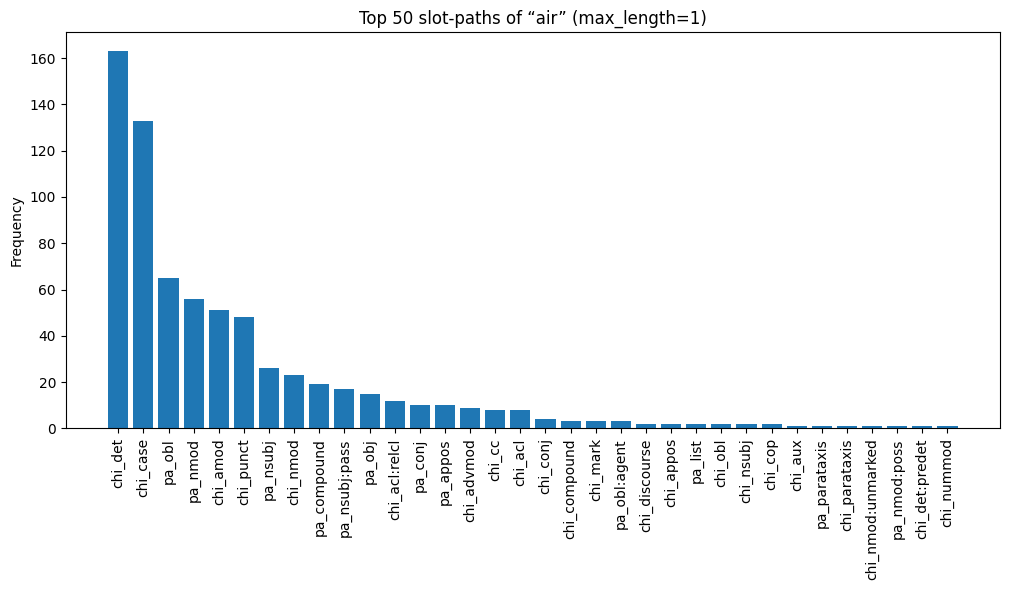

[1755] Collected 820 context links, 29 distinct arguments.


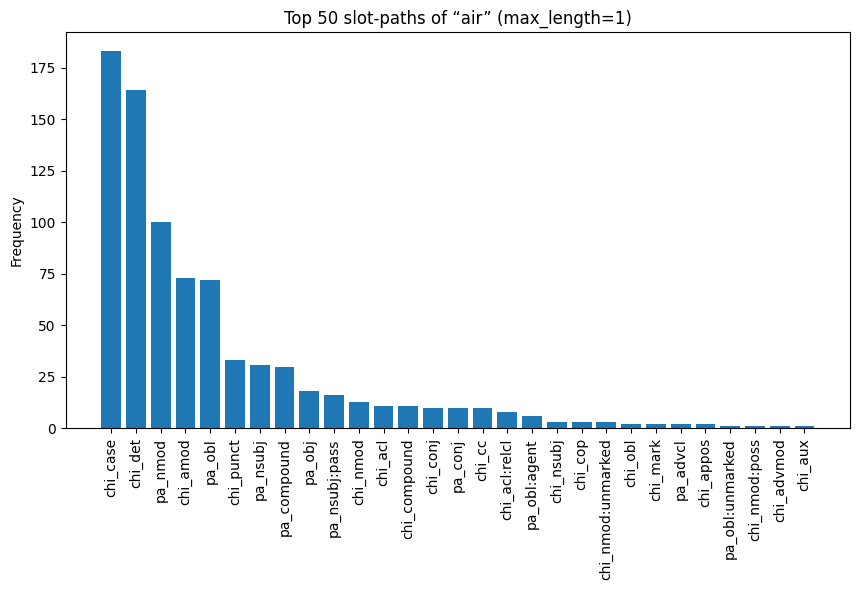

[1760] Collected 374 context links, 21 distinct arguments.


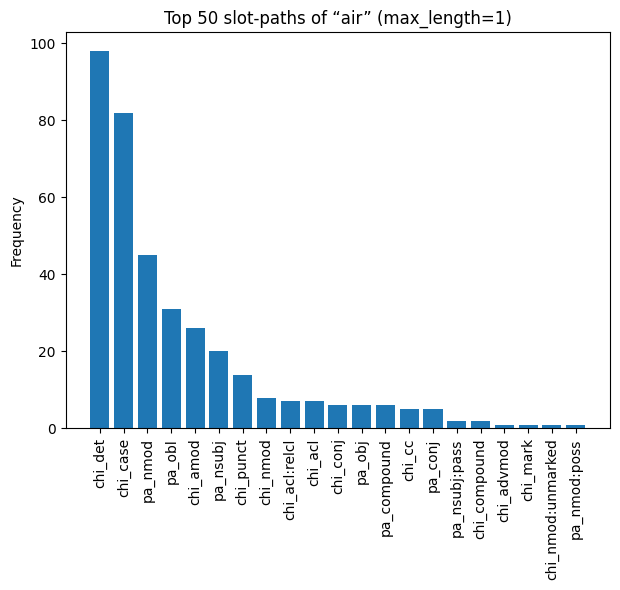

[1765] Collected 2924 context links, 39 distinct arguments.


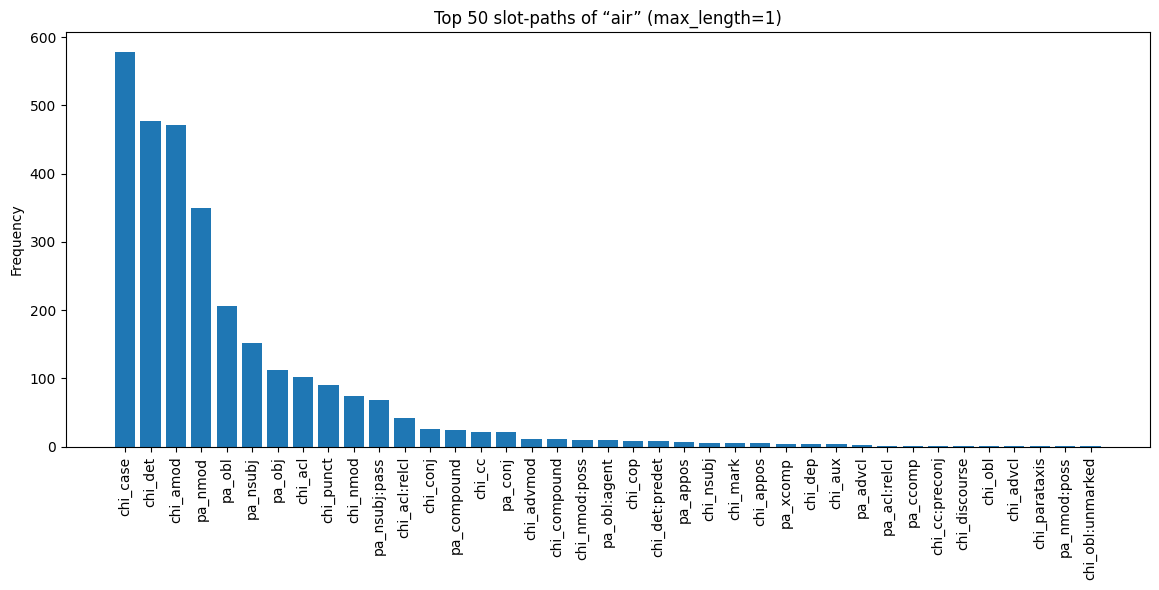

[1770] Collected 4551 context links, 45 distinct arguments.


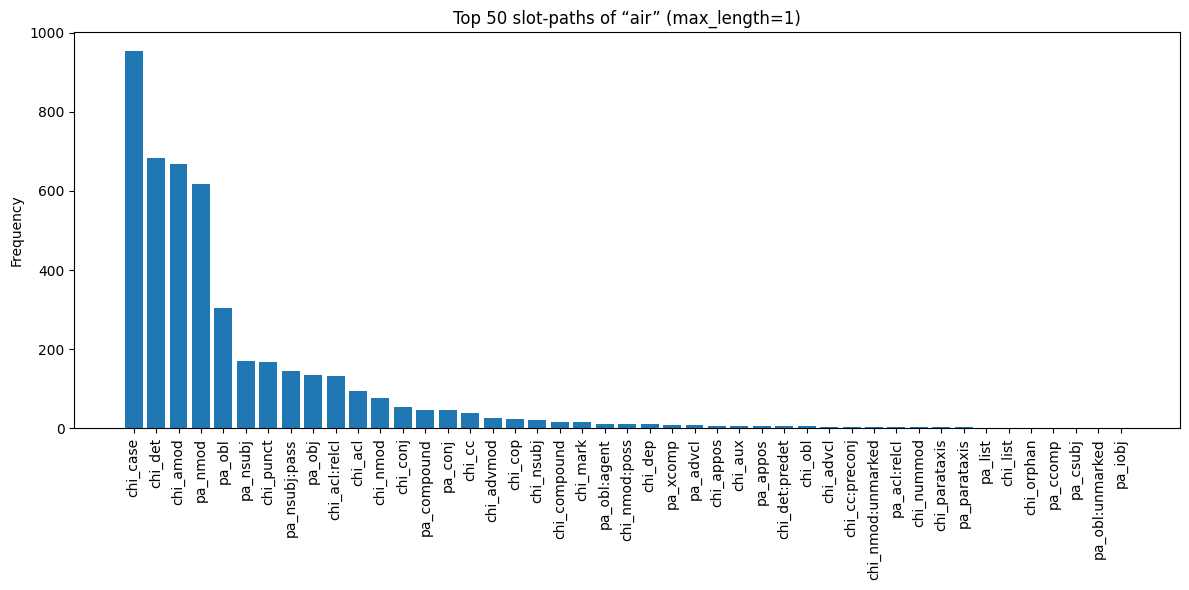

[1775] Collected 5264 context links, 44 distinct arguments.


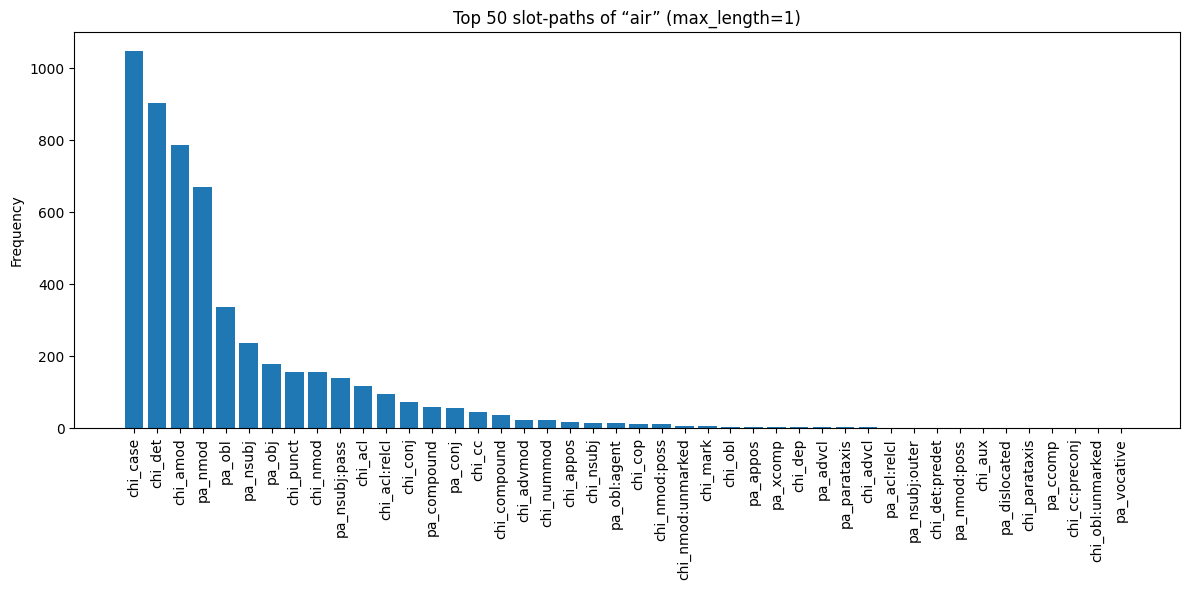

[1780] Collected 9045 context links, 50 distinct arguments.


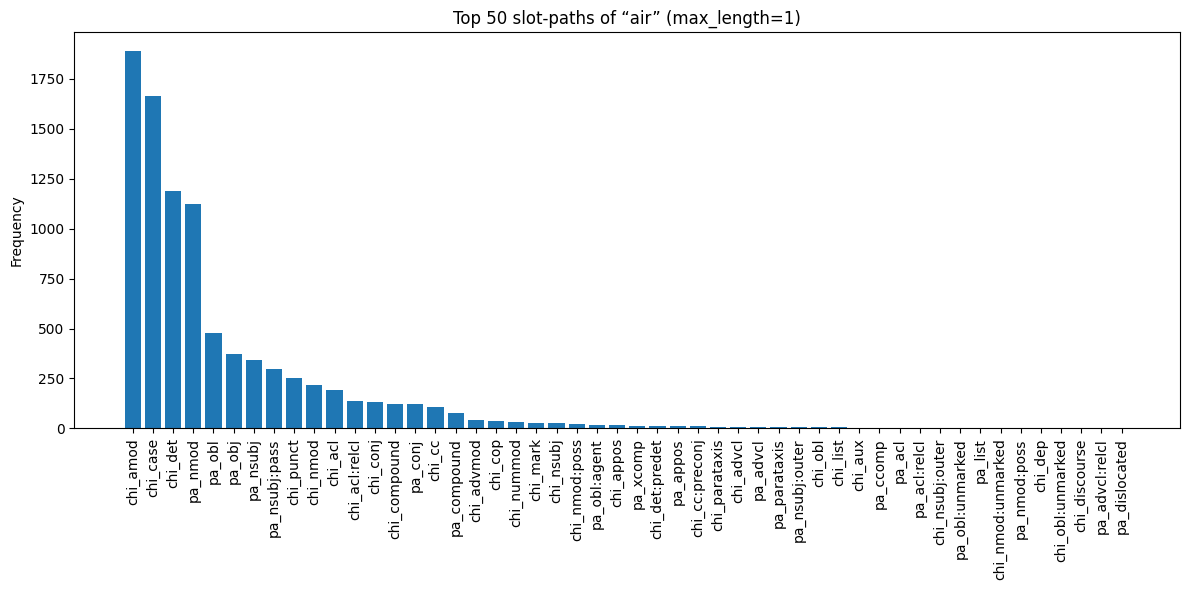

[1785] Collected 7450 context links, 44 distinct arguments.


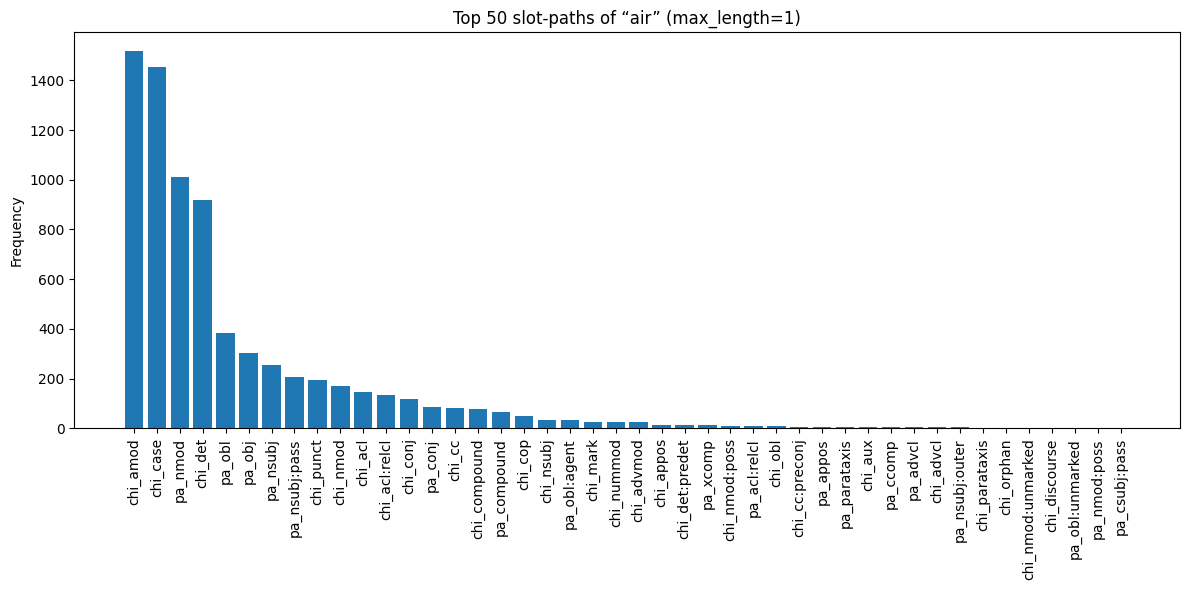

[1790] Collected 4742 context links, 42 distinct arguments.


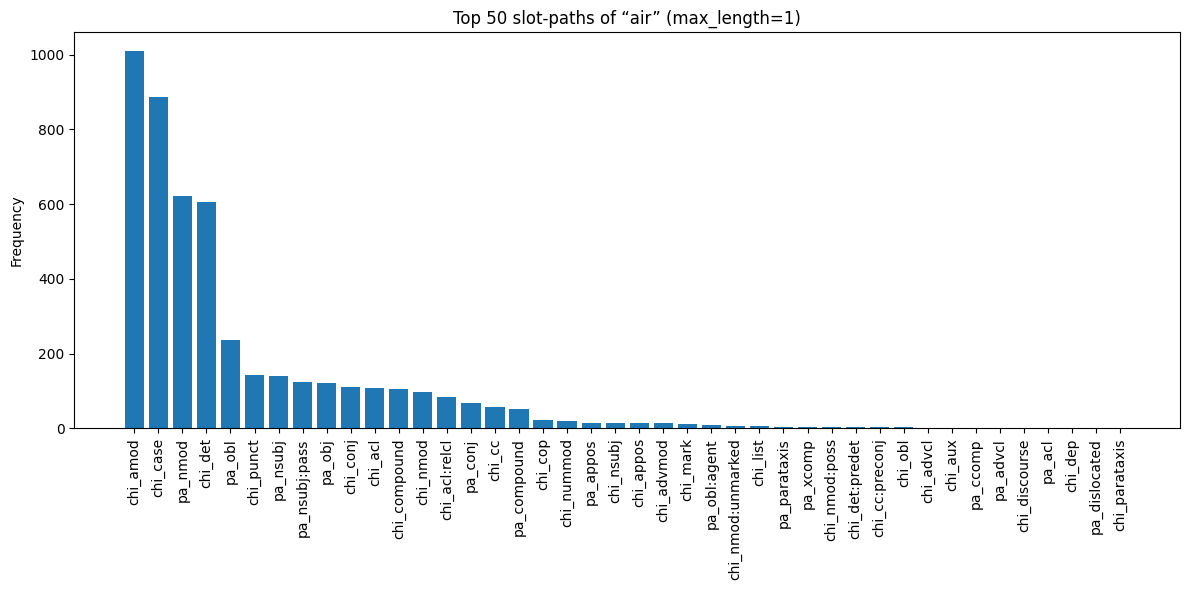

[1795] Collected 882 context links, 34 distinct arguments.


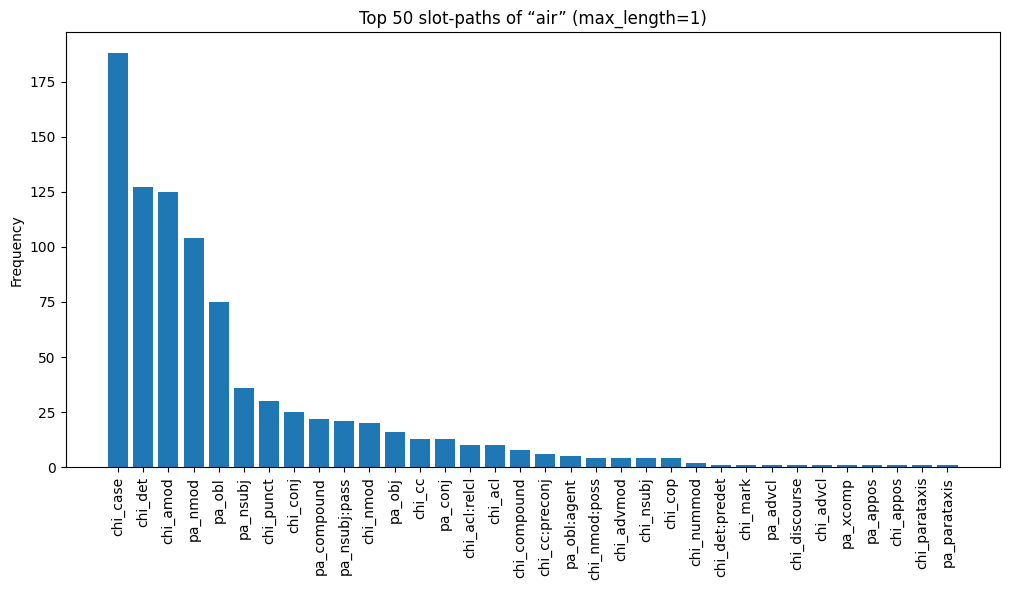

[1800] Collected 1784 context links, 39 distinct arguments.


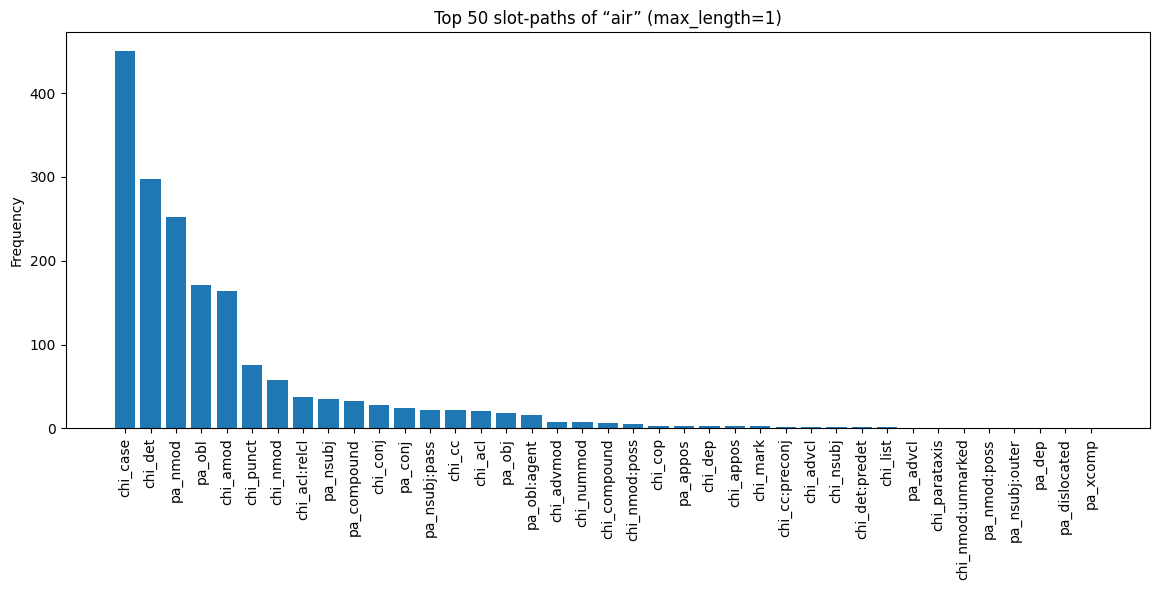

[1805] Collected 977 context links, 30 distinct arguments.


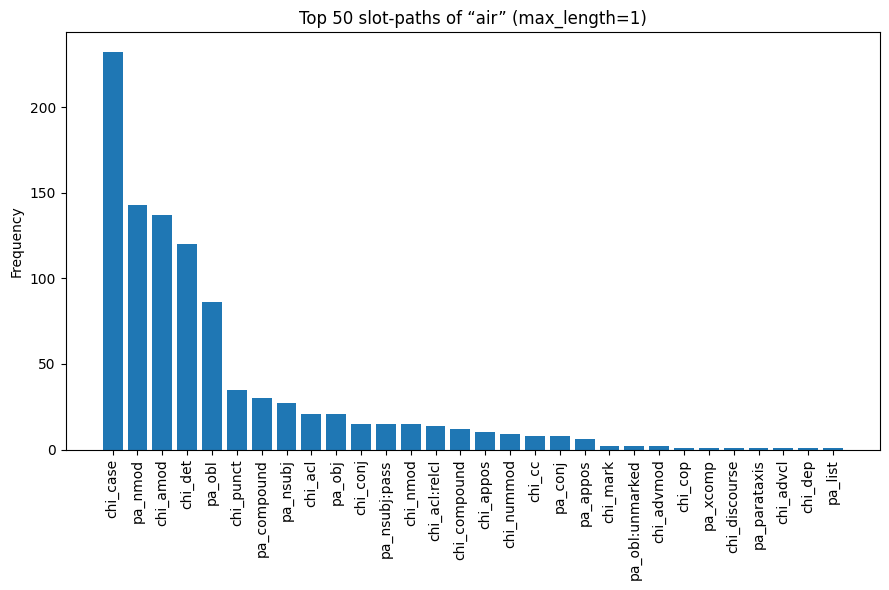

[1810] Collected 786 context links, 32 distinct arguments.


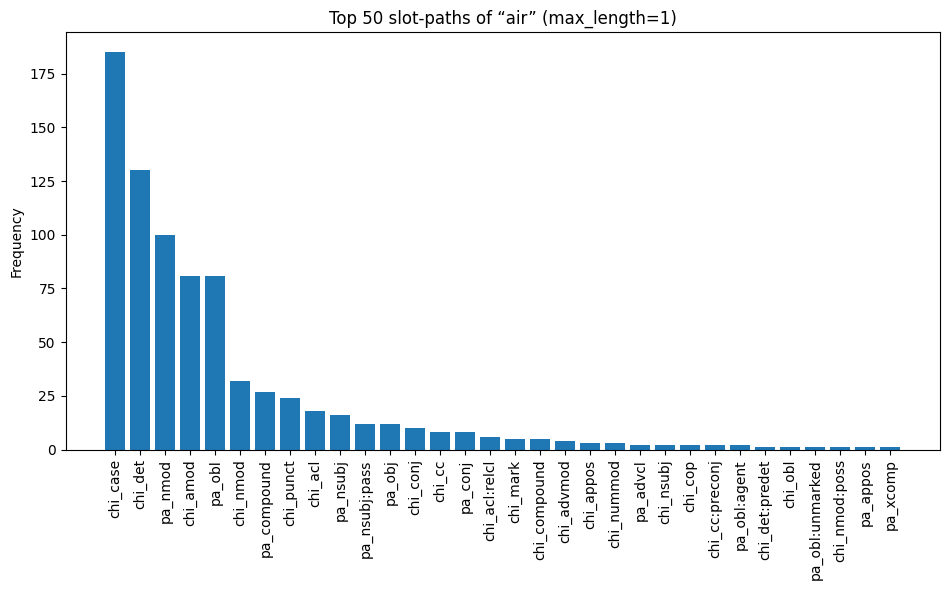

[1815] Collected 1121 context links, 30 distinct arguments.


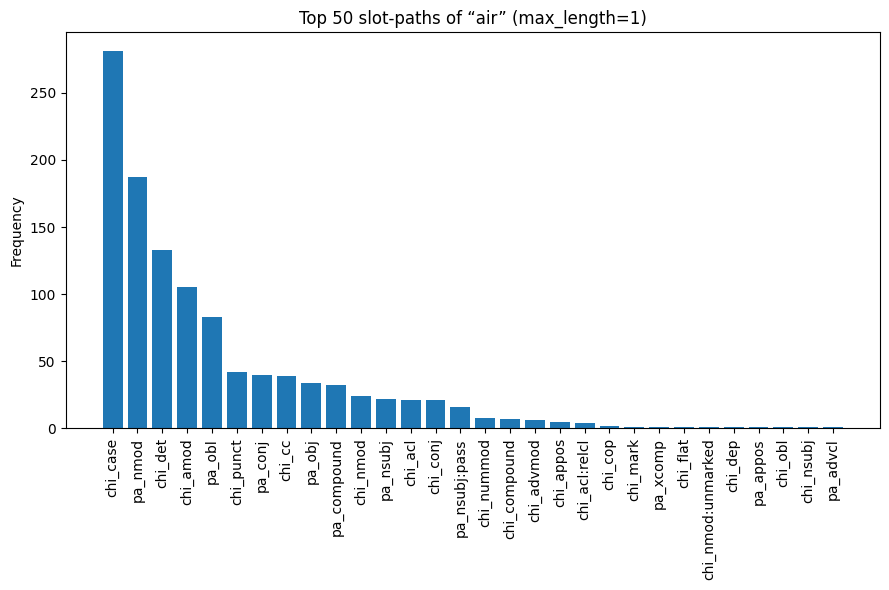

Saved slot-path frequencies to: /home/volt/bach/SynFlow/output/air-N-1750-1819/Explorer/air_N_spaths.json


In [3]:
from SynFlow.Explorer import spath_explorer
dist = spath_explorer(
    corpus_folder=corpus_folder,
    target_lemma=target_lemma,
    target_pos=target_pos,
    max_length=1,
    top_n=50,
    pattern=pattern,
    output_folder=output_explorer
)

## Unique Slot-path Combination Explorer

[1750] Total instances: 226, distinct patterns: 72


/home/local/bach/SynFlow/SynFlow/Explorer/spath_comb_explorer.py:157: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


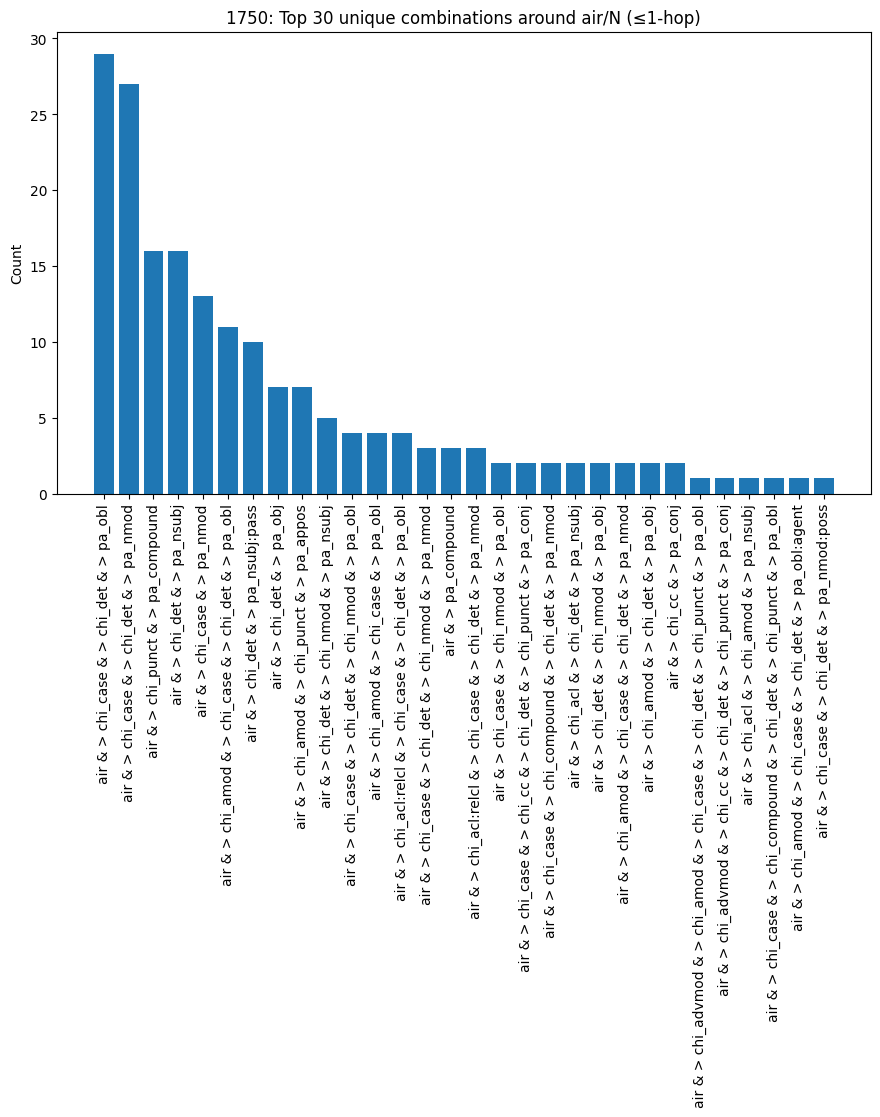

[1755] Total instances: 287, distinct patterns: 73


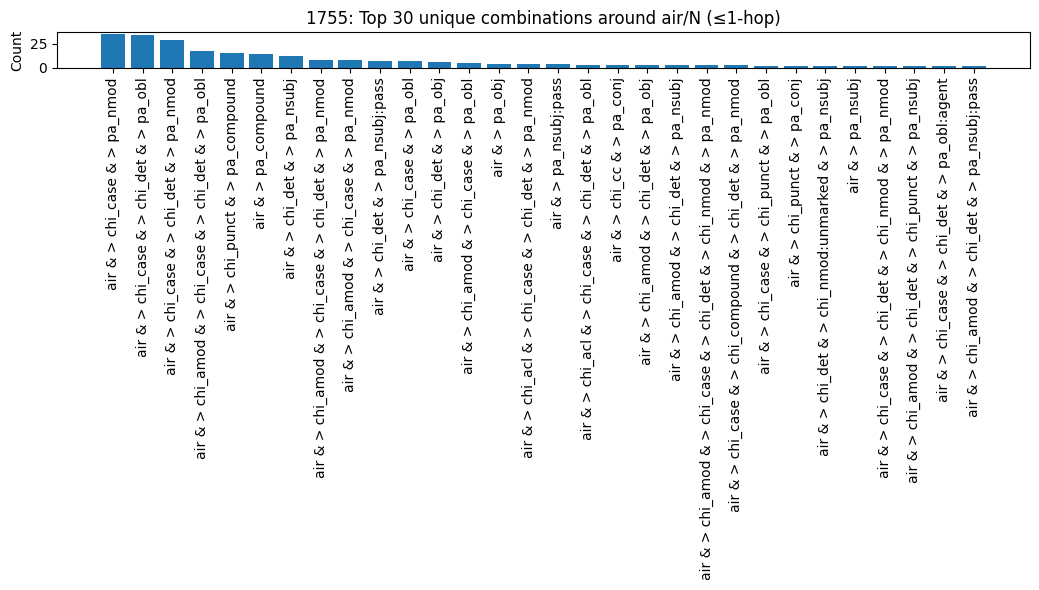

[1760] Total instances: 117, distinct patterns: 44


/home/local/bach/SynFlow/SynFlow/Explorer/spath_comb_explorer.py:157: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


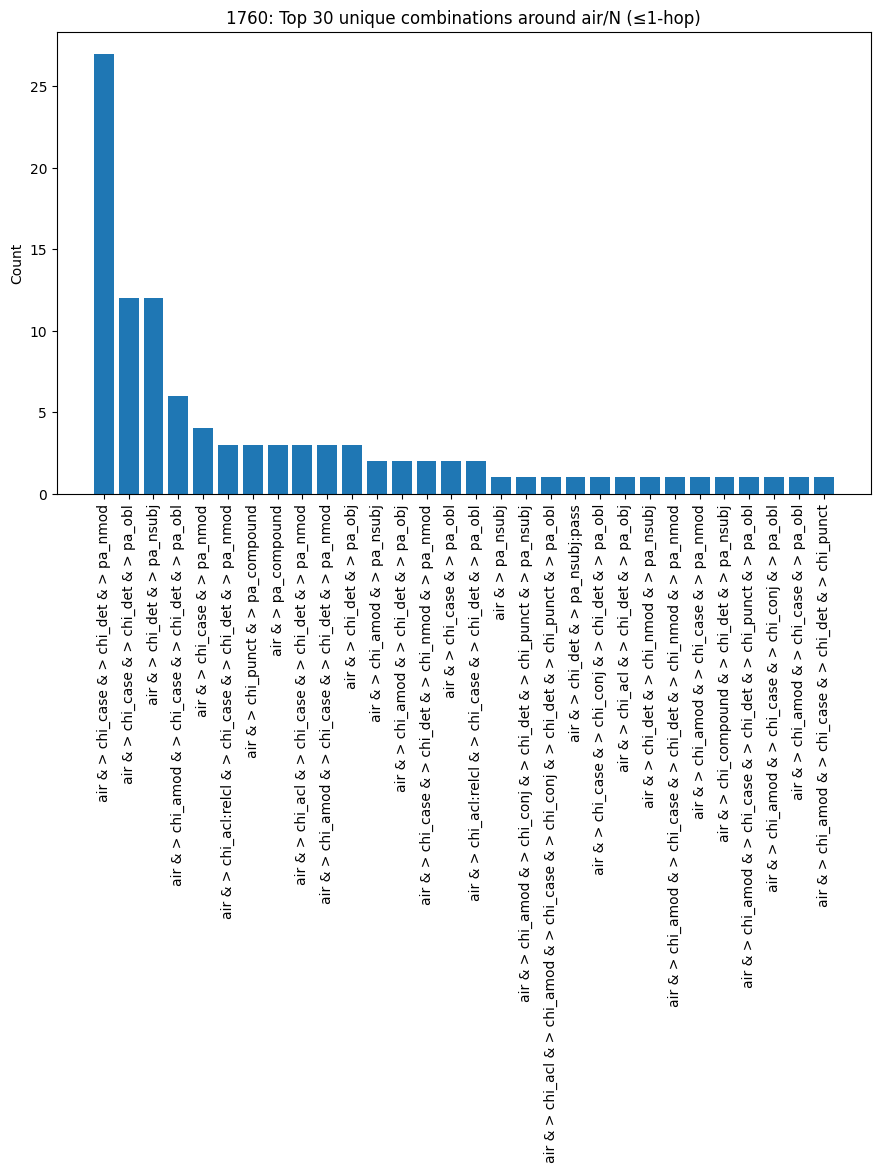

[1765] Total instances: 967, distinct patterns: 177


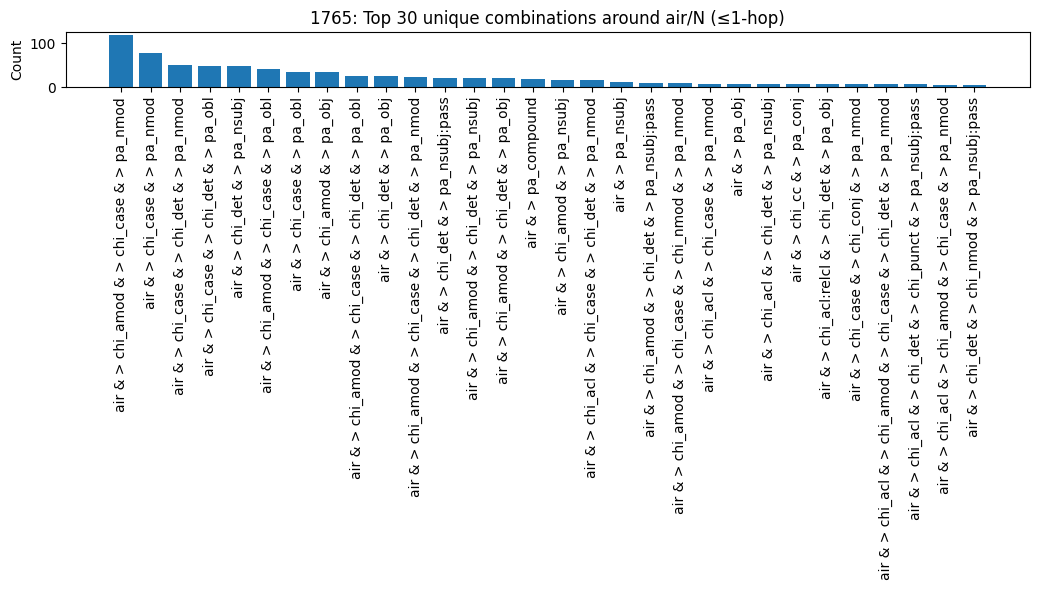

[1770] Total instances: 1516, distinct patterns: 247


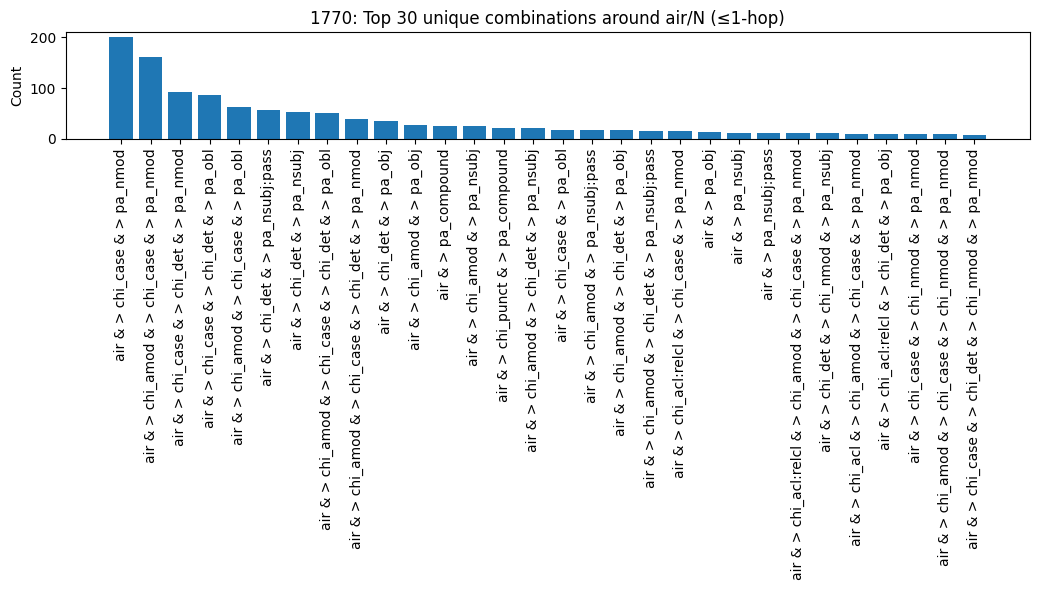

[1775] Total instances: 1721, distinct patterns: 271


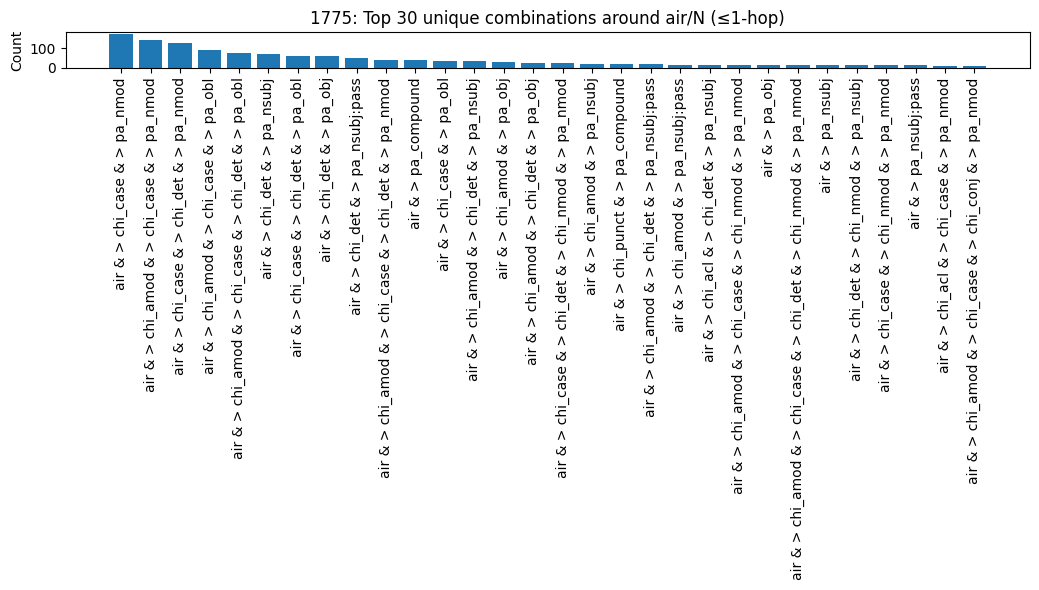

[1780] Total instances: 2900, distinct patterns: 395


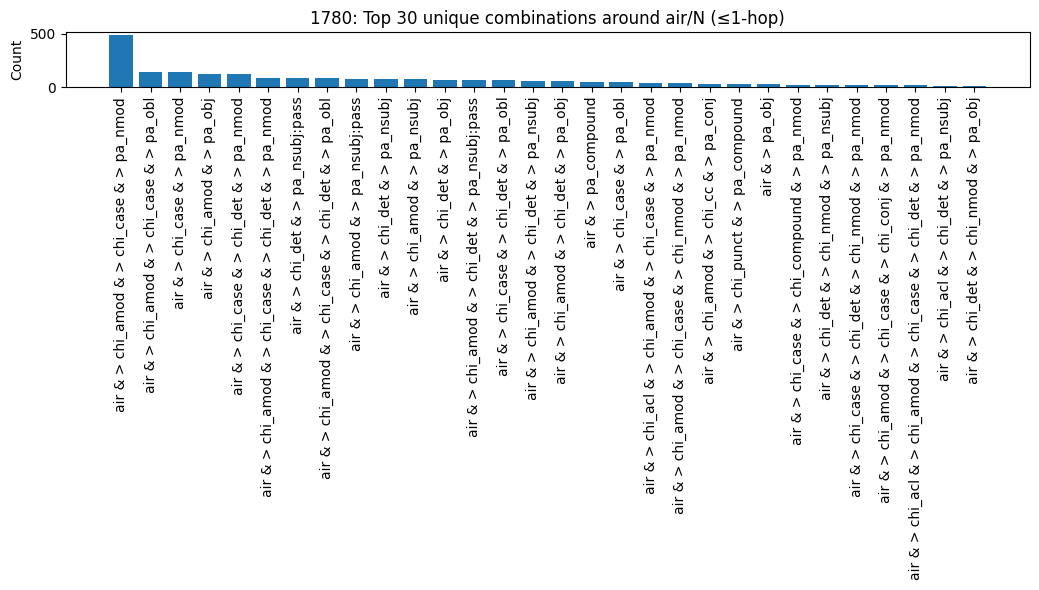

[1785] Total instances: 2405, distinct patterns: 341


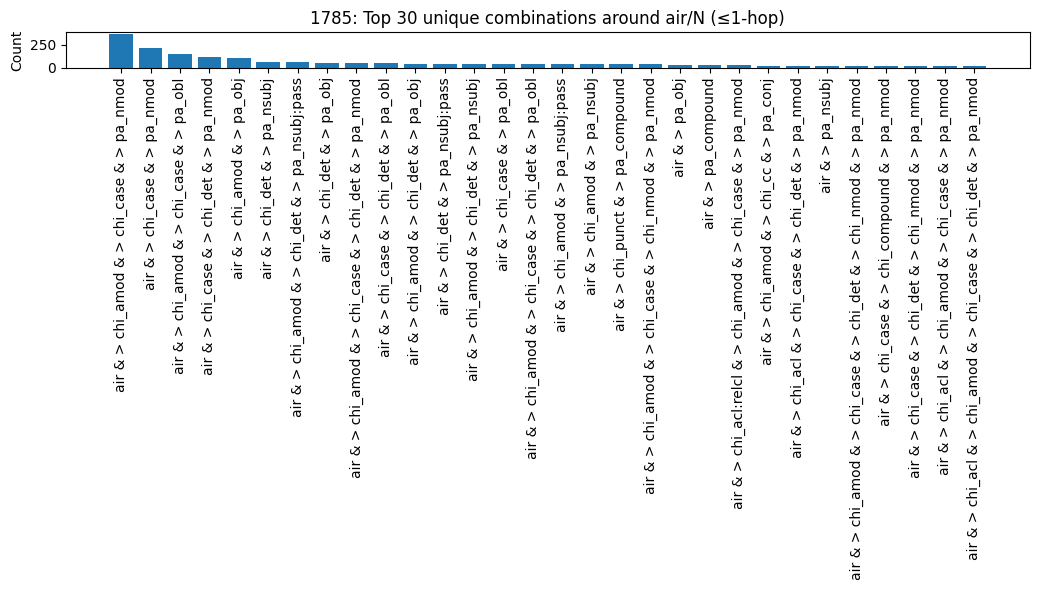

[1790] Total instances: 1414, distinct patterns: 292


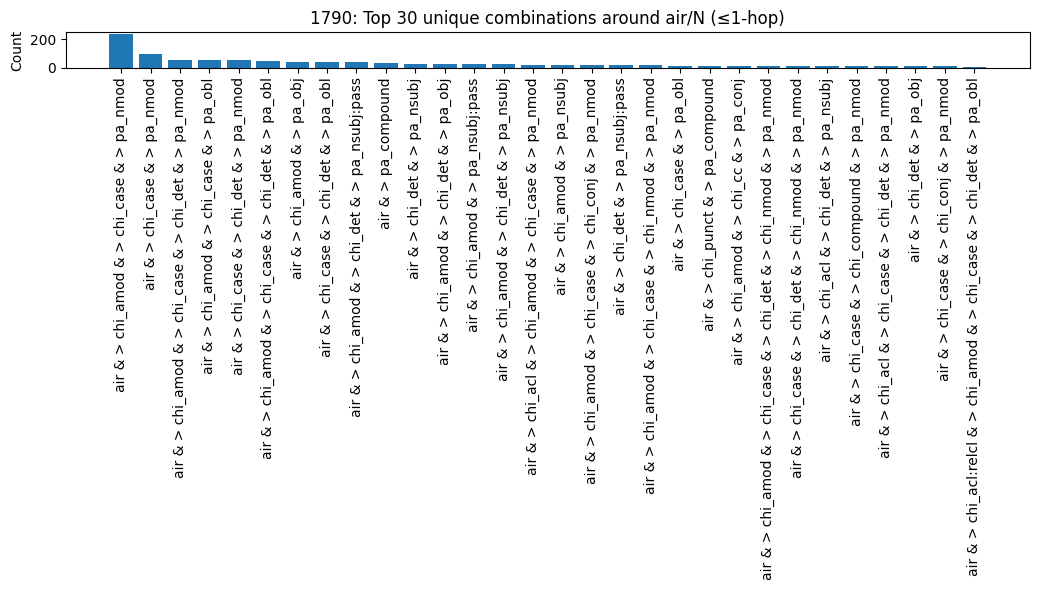

[1795] Total instances: 298, distinct patterns: 95


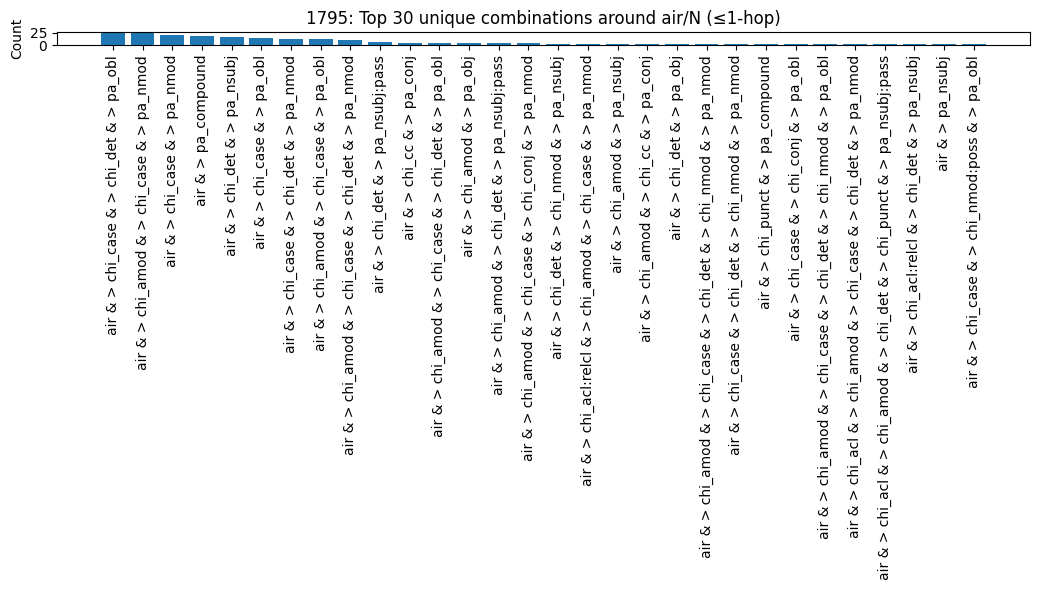

[1800] Total instances: 581, distinct patterns: 133


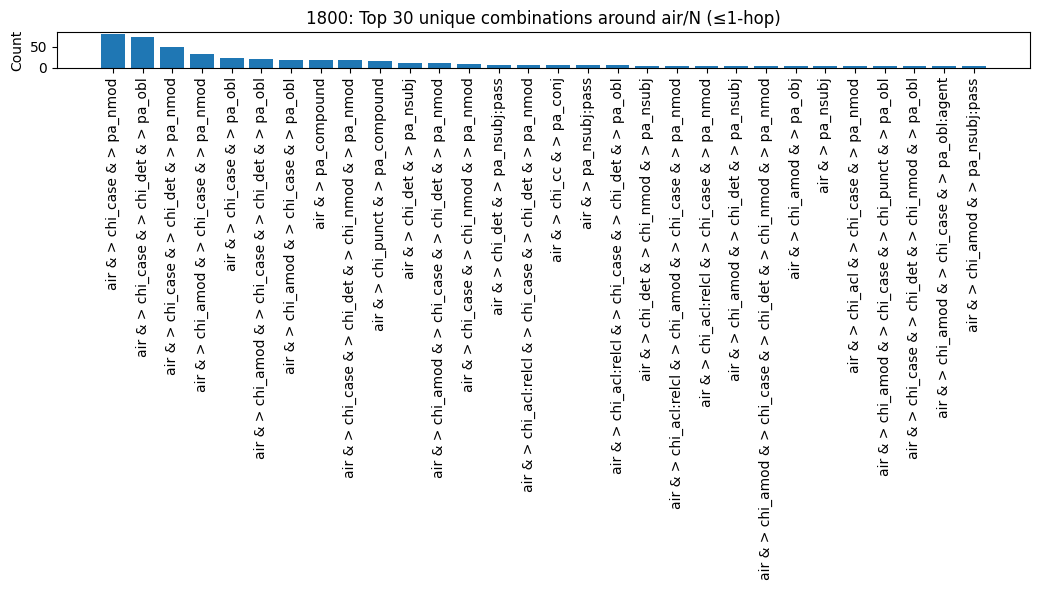

[1805] Total instances: 344, distinct patterns: 94


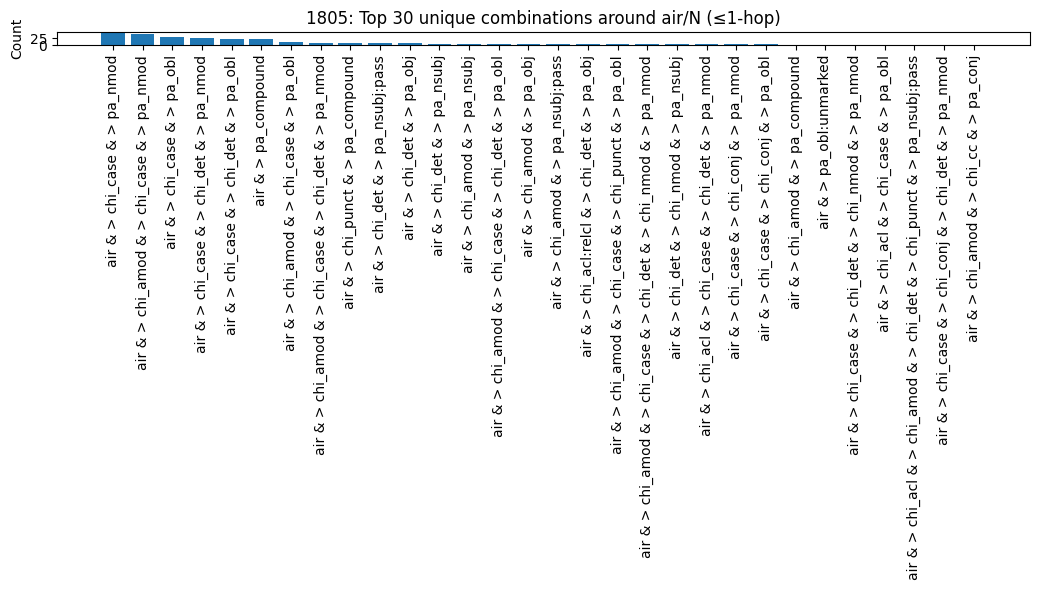

[1810] Total instances: 265, distinct patterns: 77


/home/local/bach/SynFlow/SynFlow/Explorer/spath_comb_explorer.py:157: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


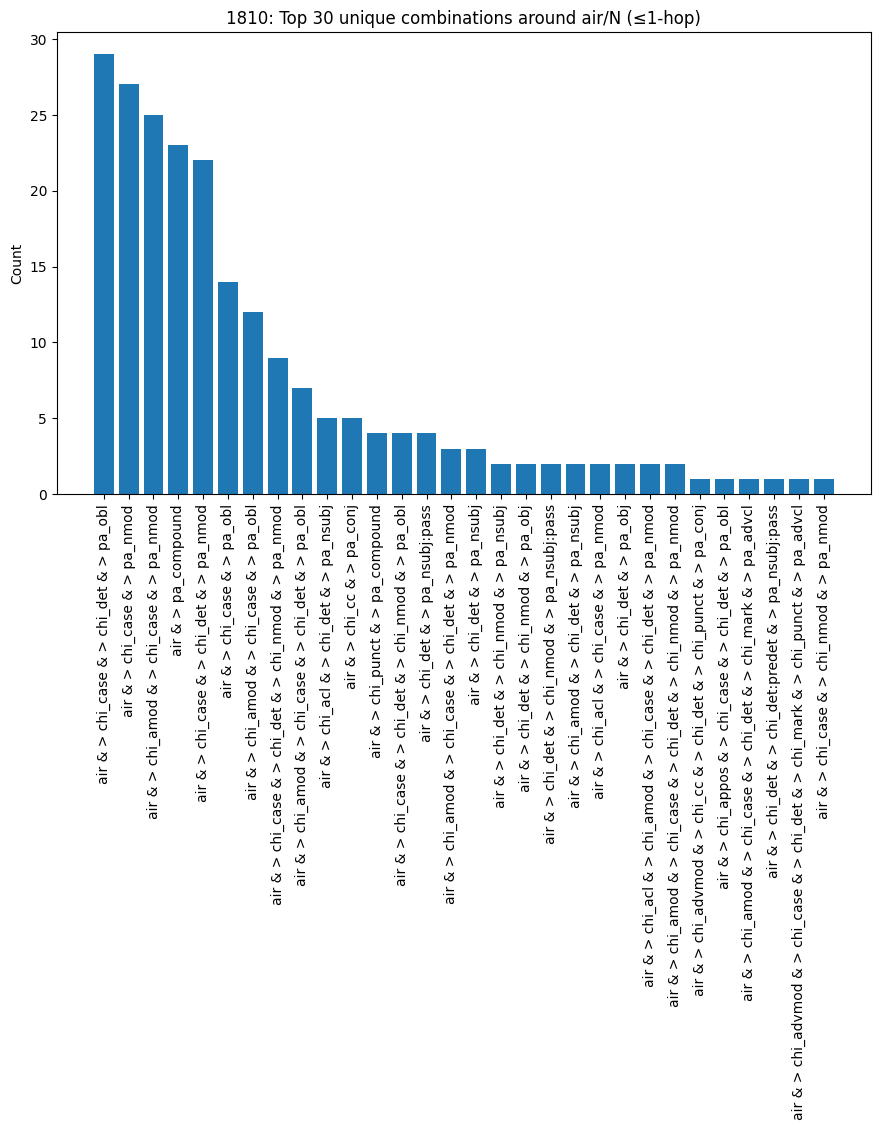

[1815] Total instances: 418, distinct patterns: 92


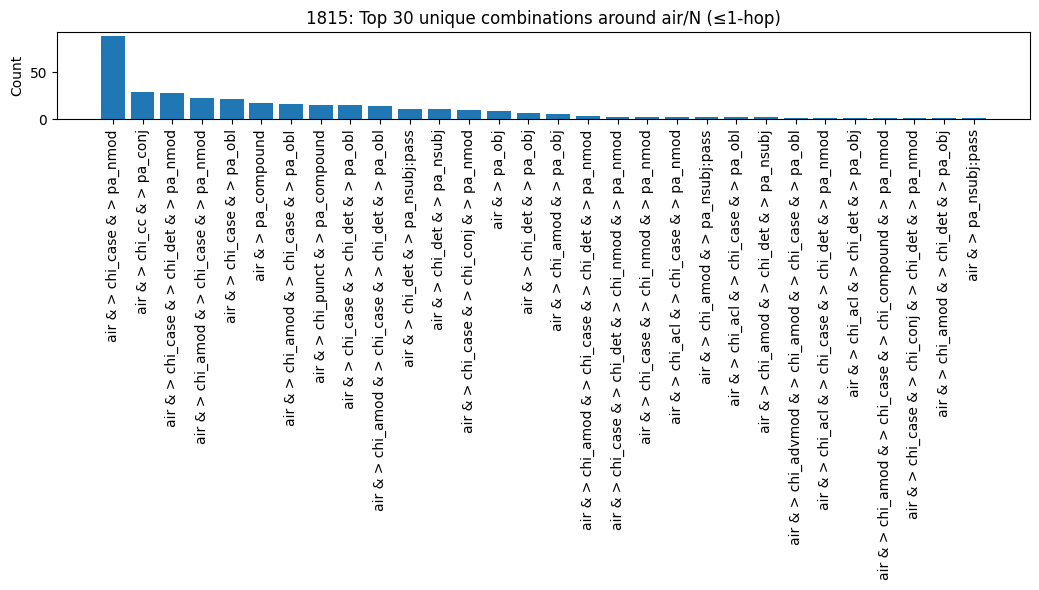

CSV saved to /home/volt/bach/SynFlow/output/air-N-1750-1819/Explorer/air_N_spath_combs_1_hops.csv


In [4]:
# 1 unique full-pattern string for 1 token
from SynFlow.Explorer import spath_comb_explorer

ctr = spath_comb_explorer(
    corpus_folder=corpus_folder,
    target_lemma=target_lemma,
    target_pos=target_pos,
    max_length=1,
    top_n=30,
    output_folder=output_explorer,
    pattern=pattern
)

## Rel Explorer

In [13]:
from SynFlow.Explorer import rel_explorer

rel_explorer_results = rel_explorer(
    corpus_folder=corpus_folder,
    pattern=pattern,            # or leave None to use default
    target_lemma=target_lemma,
    target_pos=target_pos,
    rel="pa_nsubj",
)

In [40]:
for fname, sent, sfillers, path in rel_explorer_results[:10000]:
    # ctx_list là một list các "lemma/pos", nối bằng ' > ' để in cho dễ nhìn
    sfillers = " > ".join(sfillers)
    print(f"{fname:15} | {path:10} | {sfillers:15} | {sent}")

# Save to csv
import csv
out_path = f'{output_explorer}/rel_explorer.tsv'
with open(out_path, "w", encoding="utf-8", newline="") as f:
    w = csv.writer(f, delimiter='\t')
    w.writerow(["file", "path", "sfillers", "sentence"])
    for fname, sent, sfillers, path in rel_explorer_results:
        sfillers = " > ".join(sfillers)
        w.writerow([fname, path, sfillers, sent])

Royal_Society_Corpus_open_v6.0_text_105166_1753.txt | pa_nsubj   | moist/A         | ON the 7th of this month I was at the palace of St. German 's near Paris , where I had the satisfaction of feeing Dr. le Monnier 's experiment relating to the electricity of the air ; of which an account was sent me by Abbe Mazeas , and was read before our honourable Society in December last ; and I observed , that though the wind was westerly , and the air moist , yet the suspended wire , at different times , attracted very light bodies , at very small distances ; the mean of which distances seemed to be about 1 / 10 of an inch .
Royal_Society_Corpus_open_v6.0_text_105167_1753.txt | pa_nsubj   | render/V        | Experiment 7 . Let the tin tube , with a pair of balls at one end , be placed three feet at least from any part of the room , and the air rendered very dry by means of a fire : electrify the apparatus to a considerable degree ; then touch the tin tube with a finger , or any other conductor , 

## Full Rel Explorer

In [ ]:
from SynFlow.Explorer import full_rel_explorer

full_rel_explorer_results = full_rel_explorer(
    corpus_folder=corpus_folder,
    pattern=pattern,            # or leave None to use default
    target_lemma=target_lemma,
    target_pos=target_pos,
    rel="chi_case & chi_det & pa_obl",
    # rel="chi_aux & chi_nsubj & chi_obj & chi_punct",
    # rel="chi_discourse > chi_punct & chi_punct",
    mode = 'close', # 'open', 'close', 'closeh'
)

In [39]:
# inspect a few
sent_num = 0
for fname, sent, paths_details_list in full_rel_explorer_results[:10]:
    sent_num += 1
    # paths_details_list is a list of (sfillers, path) tuples
    for sfillers, path in paths_details_list:
        # sfillers is a list of "lemma/pos", join using ' > ' to print
        sfillers = " > ".join(sfillers)
        print(f"{sent_num} | {fname:15} | {path:10} | {sfillers:15} | {sent}")

# Save to csv
import csv
out_path = f'{output_explorer}/full_rel_explorer.tsv'
with open(out_path, "w", encoding="utf-8", newline="") as f:
    w = csv.writer(f, delimiter='\t')
    w.writerow(["sent_num", "file", "path", "ctx_nodes", "sentence"])
    sent_num = 0
    for fname, sent, paths_details_list in full_rel_explorer_results:
        sent_num += 1
        for sfillers, path in paths_details_list:
            sfillers = " > ".join(sfillers)
            w.writerow([sent_num, fname, path, sfillers, sent])

1 | Royal_Society_Corpus_open_v6.0_text_105074_1751.txt | chi_case   | in/A            | Thus the extremity of one of these brass rods might at pleasure , without letting in the air , be made to touch the other ; and for the better observing what difference in effect would arise from an increase of surface , a small brass circular plate was made to screw into each of these extremities .
1 | Royal_Society_Corpus_open_v6.0_text_105074_1751.txt | chi_det    | the/D           | Thus the extremity of one of these brass rods might at pleasure , without letting in the air , be made to touch the other ; and for the better observing what difference in effect would arise from an increase of surface , a small brass circular plate was made to screw into each of these extremities .
1 | Royal_Society_Corpus_open_v6.0_text_105074_1751.txt | pa_obl     | let/V           | Thus the extremity of one of these brass rods might at pleasure , without letting in the air , be made to touch the other ; and for

## Trimming

In [ ]:
import pandas as pd
df = pd.read_csv('/home/volt/bach/SynFlow/output/air-N-1750-1819/Explorer/air_N_spath_combs_1_hops.csv', sep='&')
df.head(10)

In [ ]:
from SynFlow.Explorer import trim_and_merge
df_file = '/home/volt/bach/SynFlow/output/air-N-1750-1819/Explorer/air_N_spath_combs_1_hops.csv'
trimmed_rels = ['chi_case']
trim_and_merge(df_file=df_file, trimmed_rels=trimmed_rels)

## Specialisations Grouping

In [ ]:
from SynFlow.Explorer.trimming import spe_group

df_path = '/home/volt/bach/SynFlow/output/air-N-1750-1819/Explorer/air_N_spath_combs_1_hops.csv'
tree = spe_group(df_path, output_folder=output_explorer, target_lemma=target_lemma)

# Get Slot-filler df

In [ ]:
from SynFlow.Explorer import build_sfiller_df

df_slots = build_sfiller_df(
    corpus_folder=corpus_folder,
    template='[pa_conj]', # Example: '[chi_nsubj][chi_obj][chi_obl > chi_case]'
    target_lemma=target_lemma,
    target_pos=target_pos,
    pattern=pattern,
    # freq_path='/home/volt/bach/pilot_data/RSC/lemma_pos_init_freq.txt', # Be sure that the freq_path matches that of the filter format
    # freq_min=1,
    # freq_max=100_000_000,
    filtered_pos=[],
    filler_format='lemma/pos', # lemma/deprel or 'lemma/pos'
    output_folder= output_embedding
)

In [ ]:
# Sampling from the general slots DataFrame
from SynFlow.Explorer import sample_sfiller_df
n = 5
df_sample = sample_sfiller_df(
    input_csv=f"{output_embedding}/{target_lemma}_samples_sfillerdf_all.csv",
    output_csv=f"{output_embedding}/{target_lemma}_samples_sfillerdf_{n}.csv",
    n=n,
    seed=42,
    mode= 'NA'
)